<a href="https://colab.research.google.com/github/FlorentGerbaud/Deep-Learning/blob/main/Basics%20in%20Deep%20Learning/%5BTD1%5D%20-%20Introduction%20to%20Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Torch basics
# The goal of this lab is to discover Pytorch, especially the Tensor concept.


In [60]:
torch.__version__

'2.4.1+cu121'

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import numpy as np

Largely inspired from the tutorial [What is PyTorch?](https://pytorch.org/tutorials/beginner/former_torchies/tensor_tutorial.html)

Tensors are used to encode the signal to process, but also the internal states and parameters of models.

Manipulating data through this constrained structure allows to use CPUs and GPUs at peak performance.



## Tensors

Construct a 3x5 matrix, uninitialized:

In [62]:
# Set the default floating point dtype to float32
torch.set_default_dtype(torch.float32)

# Optional: Set the default device to 'cuda' if available, otherwise 'cpu'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.set_default_device(device)
print(device)

cuda


In [63]:
x = torch.empty(3,5)
print(x.type())
print(x)

torch.cuda.FloatTensor
tensor([[1.0000, 1.0000, 1.0000, 0.2542, 0.2375],
        [0.2892, 0.1935, 0.2799, 0.2194, 0.2743],
        [0.2104, 0.2958, 0.4002, 0.3899, 0.2531]], device='cuda:0')


In [64]:
x = torch.randn(3,5)
print(x)

tensor([[-0.8372,  0.3339, -0.0144, -0.7639, -0.7986],
        [-0.9017,  1.6277, -2.4620, -0.1450,  0.2500],
        [-0.7646,  0.2476,  0.7073, -1.5636, -0.5248]], device='cuda:0')


In [65]:
print(x.size())

torch.Size([3, 5])


torch.Size is in fact a [tuple](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences), so it supports the same operations.

In [66]:
x.size()[1]

5

In [67]:
x.size() == (3,5)

True

Importance of the brackets when defining a tensor

In [68]:
a = torch.tensor([2.0])
print(type(a))
print(a.dtype)
print(a.size())

b = torch.tensor(2.0)
print(type(b))
print(b.dtype)
print(b.size())

<class 'torch.Tensor'>
torch.float32
torch.Size([1])
<class 'torch.Tensor'>
torch.float32
torch.Size([])


Select some columns

In [69]:
cols = torch.zeros(5, dtype=torch.bool)
print(cols)
cols[1] = True
cols[4] = True
print(cols)
c = x[:, cols]  # selects all rows, 2nd column and  5th column from x
print(c)

tensor([False, False, False, False, False], device='cuda:0')
tensor([False,  True, False, False,  True], device='cuda:0')
tensor([[ 0.3339, -0.7986],
        [ 1.6277,  0.2500],
        [ 0.2476, -0.5248]], device='cuda:0')


All operations on the tensor that operate in-place on it will have an _ postfix.

In [70]:
# x will be filled with the value 3.5
x.fill_(3.5)
print(x)

tensor([[3.5000, 3.5000, 3.5000, 3.5000, 3.5000],
        [3.5000, 3.5000, 3.5000, 3.5000, 3.5000],
        [3.5000, 3.5000, 3.5000, 3.5000, 3.5000]], device='cuda:0')


## Bridge to numpy

In [71]:
y = x.cpu().numpy()
print(y)

[[3.5 3.5 3.5 3.5 3.5]
 [3.5 3.5 3.5 3.5 3.5]
 [3.5 3.5 3.5 3.5 3.5]]


In [72]:
a = np.ones(5)
b = torch.from_numpy(a)
print(b)


tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [73]:
xr = torch.randn(3, 5)
a = np.ones(5).astype(int)
b = torch.from_numpy(a)
print(xr)
print(b)

tensor([[-1.3878, -0.4709,  0.0207, -0.6012, -1.1382],
        [-1.9431,  1.3687,  0.7882, -0.8133, -0.1550],
        [ 1.6016, -1.1238, -0.9374, -0.7595, -0.8940]], device='cuda:0')
tensor([1, 1, 1, 1, 1])


### Question: print the type of the content (data) of variables a, b and xr

In [74]:
# Code here
print(a.dtype)
print(b.dtype)
print(xr.dtype)

int64
torch.int64
torch.float32


## Operations

There are multiple syntaxes for operations. In the following
example, we will take a look at the addition operation.

Addition: syntax 1

In [75]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)
print(x + y)

tensor([[1.2198, 0.4963, 0.6403],
        [0.9943, 1.4998, 0.3924],
        [0.5825, 0.6561, 1.6605],
        [1.0514, 1.0769, 1.1653],
        [0.2856, 0.8833, 0.6809]], device='cuda:0')


Addition: syntax 2

In [76]:
print(torch.add(x, y))

tensor([[1.2198, 0.4963, 0.6403],
        [0.9943, 1.4998, 0.3924],
        [0.5825, 0.6561, 1.6605],
        [1.0514, 1.0769, 1.1653],
        [0.2856, 0.8833, 0.6809]], device='cuda:0')


Addition: providing an output tensor as argument

In [77]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[1.2198, 0.4963, 0.6403],
        [0.9943, 1.4998, 0.3924],
        [0.5825, 0.6561, 1.6605],
        [1.0514, 1.0769, 1.1653],
        [0.2856, 0.8833, 0.6809]], device='cuda:0')


Addition: in-place

In [78]:
# adds x to y
y.add_(x)
print(y)

tensor([[1.2198, 0.4963, 0.6403],
        [0.9943, 1.4998, 0.3924],
        [0.5825, 0.6561, 1.6605],
        [1.0514, 1.0769, 1.1653],
        [0.2856, 0.8833, 0.6809]], device='cuda:0')


**Note:** Any operation that mutates a tensor in-place is post-fixed with an ``_``.
    For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.



Any operation that mutates a tensor in-place is post-fixed with an ```_```

For example: ```x.copy_(y)```, ```x.t_()```, will change ```x```.

In [79]:
print(x.t())

tensor([[0.2657, 0.5971, 0.0687, 0.7975, 0.1960],
        [0.0510, 0.8024, 0.0974, 0.7261, 0.3186],
        [0.4122, 0.0084, 0.9315, 0.4859, 0.3541]], device='cuda:0')


In [80]:
print(x)

tensor([[0.2657, 0.0510, 0.4122],
        [0.5971, 0.8024, 0.0084],
        [0.0687, 0.0974, 0.9315],
        [0.7975, 0.7261, 0.4859],
        [0.1960, 0.3186, 0.3541]], device='cuda:0')


In [81]:
x.t_()
print(x)

tensor([[0.2657, 0.5971, 0.0687, 0.7975, 0.1960],
        [0.0510, 0.8024, 0.0974, 0.7261, 0.3186],
        [0.4122, 0.0084, 0.9315, 0.4859, 0.3541]], device='cuda:0')


You can use standard NumPy-like indexing with all bells and whistles!

In [82]:
print(x[:, 1])

tensor([0.5971, 0.8024, 0.0084], device='cuda:0')


Resizing (very useful): If you want to resize/reshape tensor, you can use ``torch.view``:

In [83]:
x = torch.randn(4, 4)
print(x)
y = x.view(16)
print(y)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(z)
print(x.size(), y.size(), z.size())

tensor([[ 1.0560, -0.6999,  0.1132, -1.5523],
        [ 0.4813, -0.8644, -0.8133,  1.1464],
        [ 0.9436, -1.4906,  0.7158, -0.5127],
        [-0.7092, -0.7007,  1.5932, -0.0098]], device='cuda:0')
tensor([ 1.0560, -0.6999,  0.1132, -1.5523,  0.4813, -0.8644, -0.8133,  1.1464,
         0.9436, -1.4906,  0.7158, -0.5127, -0.7092, -0.7007,  1.5932, -0.0098],
       device='cuda:0')
tensor([[ 1.0560, -0.6999,  0.1132, -1.5523,  0.4813, -0.8644, -0.8133,  1.1464],
        [ 0.9436, -1.4906,  0.7158, -0.5127, -0.7092, -0.7007,  1.5932, -0.0098]],
       device='cuda:0')
torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


If you have a one element tensor, use ``.item()`` to get the value as a
Python number

In [84]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-0.8980], device='cuda:0')
-0.8979537487030029


**Read later:**


  100+ Tensor operations, including transposing, indexing, slicing,
  mathematical operations, linear algebra, random numbers, etc.,
  are described
  [here](https://pytorch.org/docs/torch).

## 3D Tensors

### Question: What is the size of the following tensor?

In [85]:
y = torch.tensor([
     [
       [1, 2, 3],
       [4, 5, 6]
     ],
     [
       [1, 2, 3],
       [4, 5, 6]
     ],
     [
       [1, 2, 3],
       [4, 5, 6]
     ]
   ])
print(y)

tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]]], device='cuda:0')


In [86]:
# Code here
print(y.size())

torch.Size([3, 2, 3])


### Question: Explain the result of the next cell

## Explanation of `torch.sum()`

The `torch.sum()` function in PyTorch is used to compute the sum of elements in a tensor along a specified dimension. When called, it takes a tensor and a `dim` argument that determines the dimension over which the summation will occur. For instance, if you have a 3D tensor representing multiple matrices, specifying `dim=0` will sum the elements across different matrices, while `dim=1` will sum across the rows of each matrix, and `dim=2` will sum across the columns. This ability to reduce dimensions allows for efficient aggregation operations on multidimensional data. As a result, `torch.sum()` is particularly useful for data analysis, statistical calculations, and training machine learning models, as it facilitates the manipulation and interpretation of tensors.


In [87]:
torch.sum(y, dim=2)

tensor([[ 6, 15],
        [ 6, 15],
        [ 6, 15]], device='cuda:0')

## Broadcasting semantics

In short, if a PyTorch operation supports broadcast, then its Tensor arguments can be automatically expanded to be of equal sizes (without making copies of the data).

Two tensors are “broadcastable” if the following rules hold:

*   Each tensor has at least one dimension.
*   When iterating over the dimension sizes, **starting at the trailing dimension**, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

If two tensors x, y are “broadcastable”, the resulting tensor size is calculated as follows:
* If the number of dimensions of x and y are not equal, prepend 1 to the dimensions of the tensor with fewer dimensions to make them equal length.
* Then, for each dimension size, the resulting dimension size is the max of the sizes of x and y along that dimension.

More details [here](https://pytorch.org/docs/stable/notes/broadcasting.html)



In [88]:
# can line up trailing dimensions to make reading easier
x=torch.empty(5,1,4,1)
y=torch.empty(  4,1,3)
print((x+y).size())


torch.Size([5, 4, 4, 3])


In [89]:
# but not necessary:
x=torch.empty(1)
y=torch.empty(3,1,7)
print(y.size())
print((x+y).size())



torch.Size([3, 1, 7])
torch.Size([3, 1, 7])


In [90]:
t1=torch.tensor([
     [
       [1, 2, 3],
       [4, 5, 6]
     ],
     [
       [1, 2, 3],
       [4, 5, 6]
     ],
     [
       [1, 2, 3],
       [4, 5, 6]
     ]
   ])
print(t1.size())
t2=torch.tensor([1.0])
print(t2.size())
T=t1+t2
print(T)
print(T.size())

torch.Size([3, 2, 3])
torch.Size([1])
tensor([[[2., 3., 4.],
         [5., 6., 7.]],

        [[2., 3., 4.],
         [5., 6., 7.]],

        [[2., 3., 4.],
         [5., 6., 7.]]], device='cuda:0')
torch.Size([3, 2, 3])


### Question: The following command does not work. Why?



In PyTorch, the line `print((x + y).size())` fails because the tensors `x` and `y` cannot be broadcast together due to incompatible dimensions. Tensor `x` has a shape of `(5, 2, 4, 1)`, while tensor `y` has a shape of `(3, 1, 1)`. When attempting to broadcast, the dimensions are compared from the last dimension to the first. The first dimensions (5 and 3) do not match, preventing broadcasting. Therefore, PyTorch raises an error when trying to perform the addition since the shapes are not compatible for broadcasting.


In [91]:
x=torch.empty(5,2,4,1)
y=torch.empty(  3,1,1)
print((x+y).size())


RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 1

In [92]:
x=2*torch.ones(  2,4)
y=torch.ones(3,2,4)
print(x+y)

tensor([[[3., 3., 3., 3.],
         [3., 3., 3., 3.]],

        [[3., 3., 3., 3.],
         [3., 3., 3., 3.]],

        [[3., 3., 3., 3.],
         [3., 3., 3., 3.]]], device='cuda:0')


### Question: What is the diffence between "x = xr" and "x = xr.clone()"?

In [93]:
x = xr.clone()
x.add_(-xr)
print(x)
print(xr)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], device='cuda:0')
tensor([[-1.3878, -0.4709,  0.0207, -0.6012, -1.1382],
        [-1.9431,  1.3687,  0.7882, -0.8133, -0.1550],
        [ 1.6016, -1.1238, -0.9374, -0.7595, -0.8940]], device='cuda:0')


Also be careful, changing the torch tensor modify the numpy array and vice-versa...

In [94]:
y=torch.ones(2,4)
print(y)
z = y.cpu().numpy()
print(z)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], device='cuda:0')
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [95]:
np.add(z, 1, out=z)
print("z=", z)
print("y=", y,"\n")
torch.add(y, -4, out=y)
print("z=",z)
print("y=",y)

z= [[2. 2. 2. 2.]
 [2. 2. 2. 2.]]
y= tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], device='cuda:0') 

z= [[2. 2. 2. 2.]
 [2. 2. 2. 2.]]
y= tensor([[-3., -3., -3., -3.],
        [-3., -3., -3., -3.]], device='cuda:0')


## Computational graphs

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch

In [97]:
# Install torchviz if not installed before on your laptop
!pip install torchviz

# WARNING: You should install the graphviz package in your system (not just the python package).
# If so, you must visit
# https://graphviz.org/download/

In [98]:
import torchviz

### Question: Give an interpretation of the information in the graph drawn in the next cell.

###Interprétation du graphe de rétropropagation :
Dans ce code, on définit une opération tensorielle y = w * x + 2 où x est un tenseur de taille (2, 2) et w est un tenseur de taille (1, 1). La variable requires_grad=True permet de suivre les gradients pour les calculs de rétropropagation.

Propagation avant : Le tenseur y est calculé en multipliant w par x (multiplication élément par élément) puis en ajoutant 2.
Rétropropagation :
Le premier nœud de rétropropagation est lié à l'addition (AddBackward0), mais comme l'ajout de 2 est une constante, elle n'affecte pas les gradients.
Ensuite, la rétropropagation continue avec la multiplication (MulBackward0), où les vrais gradients sont calculés pour x et w.
Le graphe visualisé montre cette séquence d'opérations : les gradients sont d'abord accumulés dans AccumulateGrad, puis les opérations de multiplication et d'addition sont traitées dans l'ordre inverse de la propagation avant.



tensor([[1., 1.],
        [1., 1.]], device='cuda:0', requires_grad=True)
tensor([[0.8178]], device='cuda:0', requires_grad=True)
tensor([[2.8178, 2.8178],
        [2.8178, 2.8178]], device='cuda:0', grad_fn=<AddBackward0>)


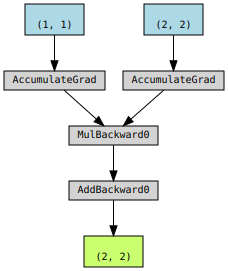

In [99]:
x = torch.ones(2, 2, requires_grad=True)
w = torch.rand(1, 1, requires_grad=True)
print(x)
print(w)
y = w * x + 2
print(y)
torchviz.make_dot(y)

## Create your first neural network (with random parameters)

In [100]:
import torch
import torch.nn as nn
import torch.nn.functional as F

Let's define the neural network model as a class

In [101]:
# Définition de la classe du réseau de neurones
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Première couche entièrement connectée (fully connected layer)
        # Prend une entrée de dimension 20 et la projette dans un espace de 10 neurones
        self.fc1 = nn.Linear(20, 10)

        # Deuxième couche entièrement connectée
        # Prend l'output de taille 10 de la première couche et la projette vers 4 neurones
        self.fc2 = nn.Linear(10, 4)

    # Définition du parcours avant des données à travers le réseau
    def forward(self, x):
        # Passer les données dans la première couche entièrement connectée
        x = self.fc1(x)

        # Appliquer la fonction d'activation ReLU pour ajouter de la non-linéarité
        x = F.relu(x)

        # Passer les données dans la deuxième couche entièrement connectée
        x = self.fc2(x)

        # Appliquer la fonction softmax pour transformer les outputs en probabilités (sur 4 classes)
        output = F.softmax(x, dim=1)

        # Retourner le résultat final
        return output

Let’s instantiate the neural network model

In [102]:
my_nn = Net()

### Question: test the model by passing some random data through it (3 random vectors following a normal distribution)

Hint: you can look at https://pytorch.org/tutorials/recipes/recipes/defining_a_neural_network.html

In [103]:
# Equates to one random 28x28 image
random_data = torch.rand(3,20)
print(random_data)
my_nn = Net()
result = my_nn(random_data)
print (result)

tensor([[0.5859, 0.0757, 0.2702, 0.2353, 0.6392, 0.7225, 0.7707, 0.4214, 0.8045,
         0.9829, 0.8376, 0.5751, 0.7847, 0.0657, 0.7130, 0.1015, 0.6362, 0.3312,
         0.8555, 0.4148],
        [0.5926, 0.7544, 0.8028, 0.5435, 0.3330, 0.2509, 0.6112, 0.4354, 0.5789,
         0.1966, 0.4220, 0.7862, 0.3409, 0.0168, 0.9045, 0.4772, 0.0515, 0.2713,
         0.7990, 0.6148],
        [0.7786, 0.0953, 0.5097, 0.7417, 0.4440, 0.2594, 0.2816, 0.5810, 0.1139,
         0.2407, 0.4410, 0.6702, 0.6104, 0.9314, 0.1178, 0.0973, 0.7638, 0.9591,
         0.3774, 0.6161]], device='cuda:0')
tensor([[0.1907, 0.2390, 0.2808, 0.2896],
        [0.1940, 0.2472, 0.2754, 0.2835],
        [0.1908, 0.2399, 0.2785, 0.2909]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)


### Question: print the computational graph of the neural network with the names of the parameters.

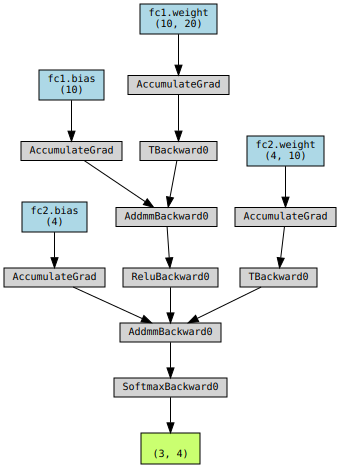

In [104]:
dot = torchviz.make_dot(result, params=dict(my_nn.named_parameters()))

# Afficher le graphe computationnel
dot.render("computational_graph", format="png")  # Sauvegarder en format PNG
dot  # Afficher dans le notebook

### Question: Verify the sum of each output. How to interpret the output?

In [105]:
# prompt: Question: Verify the sum of each output. How to interpret the output?

result_sum = torch.sum(result, dim=1)
print(result_sum)

tensor([1., 1., 1.], device='cuda:0', grad_fn=<SumBackward1>)
